# Problem 1: Time Series Forecasting (20 points)
In this problem, we want to create time series model to predict monthly car sales for a company.
Download the zip file for homework assignment #5, and use the CarSales dataset which is a standard
univariate time series dataset consists of 108 months of car sales in Quebec 1960-1968. The first
column is the date and the second is the number of sales

In [18]:
# Import necessary packages to the Jupyter notebook
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from random import randrange
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
import numpy

from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
filename ='/Users/jeremybouhadana/Downloads/hw05-DataSet/CarSales.csv'

## (a) Load time series data: Use read csv() function to load your time series datasets as a Series object, instead of DataFrame. 
Use the following arguments to the read csv() function to
ensure the data is loaded as a Series. (1 points)
• header=0: We must specify the header information at row 0.
• parse dates=True: We give the function a hint that data in the first column contains dates
that need to be parsed.
• index col=0: We hint that the first column contains the index information for the time
series.
1
• squeeze=True: We hint that we only have one data column and that we are interested in
a Series and not a DataFrame.

In [19]:
#Load time series data
series = pd.read_csv(filename, header=0, index_col=0, parse_dates=True, squeeze=True)

/var/folders/9l/pp35pbc538l6tnkr7sm9lzqh0000gn/T/ipykernel_24123/214562978.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv(filename, header=0, index_col=0, parse_dates=True, squeeze=True)


## (b) Exploring time series data: Use the head() function to peek at the first 10 records of your data. ( 1 point)

In [20]:
# Peek at the first 10 records using head()
series.head(10)

Month
1960-01-01     6550
1960-02-01     8728
1960-03-01    12026
1960-04-01    14395
1960-05-01    14587
1960-06-01    13791
1960-07-01     9498
1960-08-01     8251
1960-09-01     7049
1960-10-01     9545
Name: Sales, dtype: int64

## (c) Line plot: Use the plotting functions( .plot() and .show() ) from Matplotlib to visualize your Series of the monthly car sales dataset as a line plot. (1 point)

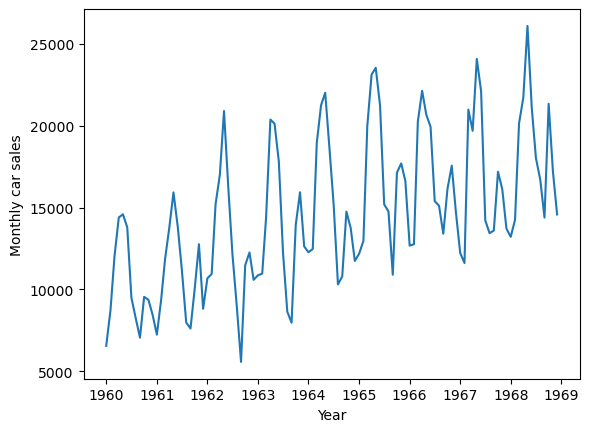

In [21]:
#plot the time series as a line plot
plt.plot(series)
plt.xlabel('Year')
plt.ylabel('Monthly car sales')
plt.show()

## (d) Autocorrelation plot: Use Pandas plotting function autocorrelation plot() to create an autocorrelation plot for your series. (2 points)

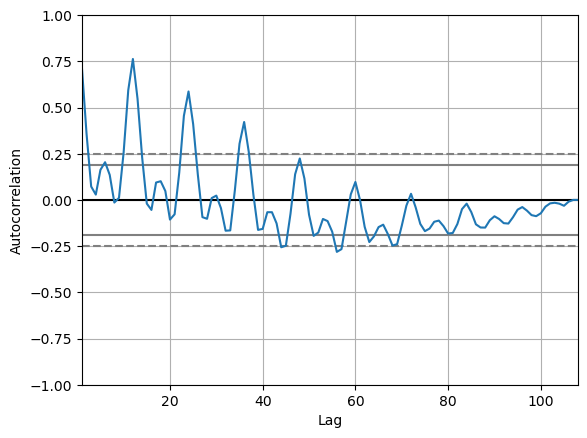

In [22]:
#Create the autocorrelation plot
autocorrelation_plot(series)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

## (e) Stationarity in time series data: Use the adfuller() function from the Statsmodels library to perform Dickey-Fuller test to check if your time series is stationary or non-stationary. Interpret the results of the test. (4 points)

In [23]:
#Dickey-Fuller test
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.223813
p-value: 0.663269
Critical Values:
	1%: -3.501
	5%: -2.892
	10%: -2.583


The null hypothesis implies that the time series is non stationary. The alternative hypothesis states that the time series is stationary. The ADF statistic is 1.223813 and the p-value is 0.663269. Since the p-value is greater than the significance level (0.05), we fail to reject the null hypothesis. The ADF statistic is also higher than the critical values at 1%, 5%, and 10%. It is concluded that the time series is non-stationary. 

## (f) Automatic time series decomposition: Use seasonal decompose() function from Statsmodels library. Specify your model as ‘additive’ and use the .plot() function to visualize the four resulting series. Interpret the results (Do you observe any trend; if yes, what kind of trend; Is there any seasonality in your data). (2 points)

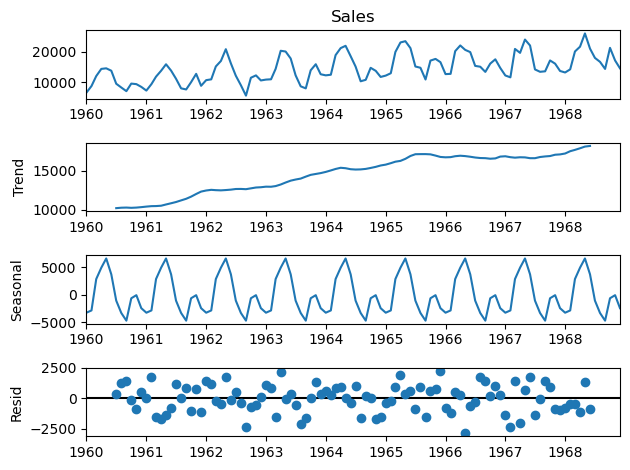

In [24]:
result = seasonal_decompose(series, model='additive')
result.plot()
pyplot.show()

The trend graph shows a clear increase in car sales over the time period. There seems to be a seasonality of repeating high and low patterns.

## (g) Detrend by model fitting: Use a linear model to detrend your time series data: (4 points)
- i. Use the scikit-learn LinearRegression model to fit a linear model on your data.
- ii. Use .predict() function to calculate the trend.
- iii. Use .plot() and .show() functions to visualtize the trend and the series data on the same plot.
- iv. Deterend your sereis by subtracting the trend values from the original values of the series, and plot the resulting detrented series in a separate plot.

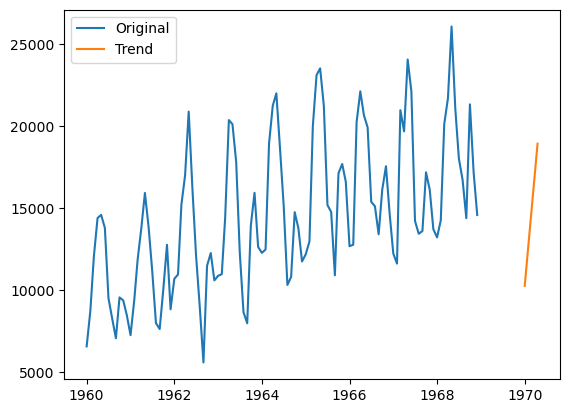

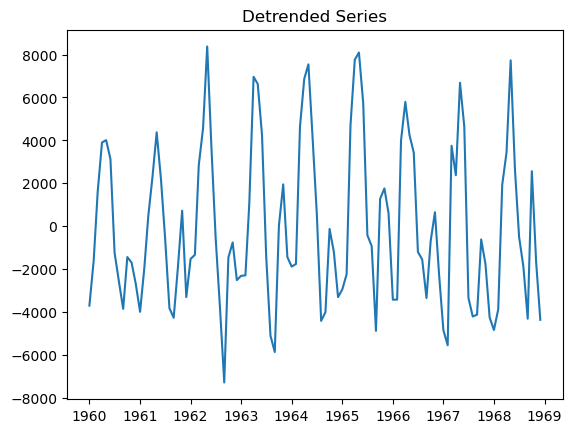

In [25]:
#fit a linear model
X = numpy.arange(0,len(series)).reshape(-1,1)
y = series.values.reshape(-1,1)
model = LinearRegression()
model.fit(X, y)

#calculate the trend
trend = model.predict(X)

#Visualize the trend and series data on the same plot
pyplot.plot(series)
pyplot.plot(trend)
pyplot.legend(['Original', 'Trend'], loc='best')
pyplot.show()

#Deterend your sereis by subtracting the trend values from the original values of the series
detrended = series - trend.reshape(-1)

#plot the resulting detrended series in a separate plot
pyplot.plot(detrended)
pyplot.title('Detrended Series')
pyplot.show()


## (h) ARIMA with Python: To answer the questions for this part, you can take a look at the code from Lab Session 10. (5 points)
- i. Extract the NumPy array of data values and split your data into train and test with a split of 70-30.
- ii. Use the forecast() function to perform a one-step forecast using the model. Use the train set to fit the model, and generate a prediction for each element on the test set.
- iii. Perform a rolling forecast by keeping track of all observations in a list called history that is seeded with the training data and to which new observations are appended each iteration; Print the prediction and expected value each iteration. To define your ARIMA model for this part use the ARIMA function from Statsmodels library, and pass in the parameters p=5, d=1, q=1.
- iv. Calculate a final root mean squared error score (RMSE) for the predictions.
- v. Create a line plot to show the expected values (blue) compared to the rolling forecast predictions (red).

/Users/jeremybouhadana/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jeremybouhadana/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/jeremybouhadana/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Test RMSE: 3184.122


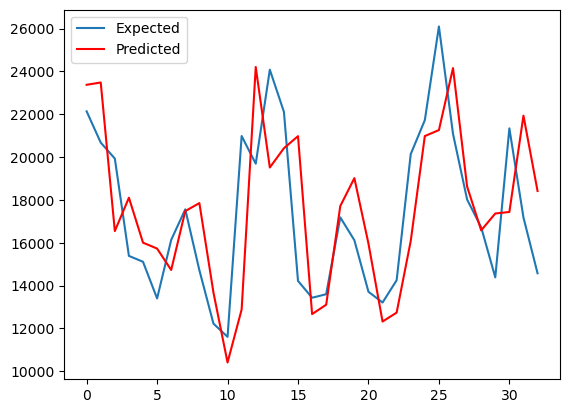

In [31]:
#Split data
train_size = int(len(series) * 0.7)
train_data, test_data = series[:train_size], series[train_size:]

#ARIMA model on training data
p = 5
d = 1
q = 1

model = ARIMA(train_data, order=(p,d,q))
model_fit = model.fit()

#make one-step forecast on the test data
one_step_forecast = model_fit.forecast()

#perform a rolling forecast on the test data
history = [x for x in train_data]
predictions = []
expected = []
for t in range(len(test_data)):
    #Define and fit ARIMA model
    model = ARIMA(history, order=(p,d,q))
    model_fit = model.fit()
    #forecast
    yhat = model_fit.forecast()[0]
    #append the predicted value list
    predictions.append(yhat)
    #append the true value list
    expected.append(test_data[t])
    #append the true value to history
    history.append(test_data[t])

# Calculate RMSE 
rmse = np.sqrt(mean_squared_error(expected, predictions))
print('Test RMSE: %.3f' % rmse)

#Create a line plot of expected vs. predicted values
plt.plot(expected, label='Expected')
plt.plot(predictions, label='Predicted', color='red')
plt.legend()
plt.show()

# 2. Problem 2: Multilayer Perceptron for Binary Classification (15 points)
In this problem you will create a classification neural network in Keras using the KerasClassifier
wrapper. For this problem, from the zip file you downloaded for homework assignment #5, use
the pima-indians-diabetes dataset. The objective of the dataset is to diagnostically predict whether
or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Several constraints were placed on the selection of these instances from a larger database. In
particular, all patients here are females at least 21 years old of Pima Indian heritage. The datasets
consists of several medical predictor variables and one target variable. Predictor variables includes
the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
2
Important Note: For reproducibility porpuses, you need to call the function reset seeds()
(already included in the code below) every time before running the model. Doing that you will
obtain reproducible results. DO NOT change the seed numbers specified in the code below (use
as-is).


In [32]:
# Import necessary packages to the Jupyter notebook
import numpy as np
import tensorflow as tf
import random as python_random
# fix random seed for reproducibility
def reset_seeds():
    np.random.seed(123)
    python_random.seed(123)
    tf.random.set_seed(1234)
reset_seeds()
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers . scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy
from pandas import read_csv
# load the dataset
filename = "/Users/jeremybouhadana/Downloads/hw05-DataSet/pima-indians-diabetes.csv"
names = ['preg ', 'plas ', 'pres ', 'skin ', 'test ', 'mass ', 'pedi ', 'age ', 'class ']
dataset = read_csv( filename , names = names )
# split into input (X) and output (y) variables
array = dataset.values
X = array[:,0:8]
y = array[:,8]

# (a) Define your Keras model: (5 points)
- i. Define your Keras model as a fuction called create model() :
    - Create a Multilayer Perceptron (fully connected) network using the Dense class with 3 layers; use the rectifier (relu) activation function on the first two layers and the sigmoid activation function in the output layer. Include 12 neurons in the first hiddent layer, and 8 neurons in the second hidden layer, and finally one neurons in the output layer to predict the class.
- ii. Compile your model and return it:
    - Compile the model using ‘binary crossentropy’ loss, ‘adam’ optimizer and the ‘accuracy’ as the classification metric.

In [33]:
#Define Keras model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    #Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

## (b) Create model using KerasClassifier wrapper class: Wrap your deep learning model using KerasClassifier wrapper: (2 points)
- i. Pass the function name create model to the KerasClassifier class by the build fn argument.
- ii. Run the model for 10 number of epochs and a batch size of 16.
- iii. Turn off the verbose output by setting verbose to 0

In [34]:
# model with KerasClassifier wrapper class
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=16, verbose=0)

/var/folders/9l/pp35pbc538l6tnkr7sm9lzqh0000gn/T/ipykernel_24123/1845224356.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=16, verbose=0)


## (c) Evaluate model with cross-validation: (3 points)
- i. Call the function reset seeds() , before running the model. This will let you obtain reproducible results.

In [35]:
reset_seeds()

#creat kfold
kfold = KFold(n_splits=10, shuffle=True, random_state=123)

# evaluate model using cross-validation
results = cross_val_score(model, X, y, cv=kfold)

# print mean and standard deviation of results
print("Accuracy: {:.2f} % (± {:.2f} %)".format(results.mean()*100, results.std()*100))


Accuracy: 63.55 % (± 5.86 %)


## (d) Grid search parameters: Using GridSearchCV class, perform a grid search on the number of epochs [20,50,70], and the batch sizes of [5,10,20]: (5 points)
- i. Call the function reset seeds() , before running the model. This will let you obtain reproducible results.
- ii. Create a dictionary and pass it to the configuration of the GridSearchCV scikit-learn class.
- iii. Use Kfold cross-validation you built previously (with 5 splits random state =7, and shuffle = True) as you validation method.
- iv. Fit the model by calling the .fit() function on your grid search result.
- v. Use the cv results attribute of GridSearchCV to collect and print ‘mean test score’, ‘std test score’ and ‘params’ for the 10 folds.
- vi. Use best score and best params attributes of GridSearchCV to print the best scores along with the best performing values for the parameters.

In [36]:
reset_seeds()

#grid search parameters
param_grid = {
    'epochs': [20, 50, 70],
    'batch_size': [5, 10, 20],
}

#KFold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=7)

#grid search object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, n_jobs=-1)

#fit the grid search to the data
grid_result = grid_search.fit(X, y)


print("Best score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, std, param))


Best score: 0.719973 using {'batch_size': 10, 'epochs': 70}
0.664027 (0.035392) with: {'batch_size': 5, 'epochs': 20}
0.708352 (0.029928) with: {'batch_size': 5, 'epochs': 50}
0.697954 (0.023042) with: {'batch_size': 5, 'epochs': 70}
0.630159 (0.017226) with: {'batch_size': 10, 'epochs': 20}
0.679688 (0.015026) with: {'batch_size': 10, 'epochs': 50}
0.719973 (0.037281) with: {'batch_size': 10, 'epochs': 70}
0.656141 (0.047625) with: {'batch_size': 20, 'epochs': 20}
0.701783 (0.030416) with: {'batch_size': 20, 'epochs': 50}
0.691486 (0.029594) with: {'batch_size': 20, 'epochs': 70}


# 3. Problem 3: CNN Model for Photo Classification (15 points)
Define a simple CNN network and evaluate how well it performs on the problem of CIFAR-10 Photo
Classification. CIFAR is an acronym that stands for the Canadian Institute For Advanced Research
and the CIFAR-10 dataset was developed along with the CIFAR-100 dataset by researchers at the
CIFAR institute. The dataset is comprised of 60,000 32×32 pixel color photographs of objects from
10 classes, such as frogs, birds, cats, ships, etc. Part of the code below loads the CIFAR-10 train
and test dataset using the Keras API.

In [37]:
# Import necessary packages to the Jupyter notebook
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.utils import to_categorical
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255.0
X_test = X_test/255.0
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

## (a) Create the CNN model: Use a structure with two convolutional layers followed by max pooling and a flattening out of the network to fully connected layers to make predictions. Define your CNN as follows: (7 points)
- Convolutional input layer, 32 feature maps with a size of 3 x 3, a rectifier (relu) activation function and a weight constraint of max norm set to 3.
- Dropout set to 20%.
- Convolutional layer, 32 feature maps with a size of 3 x 3, a rectifier activation function and a weight constraint of max norm set to 3.
- Max Pool layer with the size 2 x 2.
- Flatten layer.
- Fully connected layer with 512 units and a rectifier activation function.
- Dropout set to 50%.
- Fully connected output layer with (number of classes) 10 units and a softmax activation function.

Note: Your input shape is (32, 32, 3), as photos are in color with red, green and blue
channels (3), and they are of size 32 x 32 pixel squares. For all convolutional layers use the
padding =‘same’. The ‘padding’ value of ‘same’ calculates and adds the padding required to
the input image (or feature map) to ensure that the output has the same shape as the input.

In [38]:
#Create the model
model = Sequential()

#add  first convolutional layer
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))

#add second convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Flatten output from layers
model.add(Flatten())

#add a fully connected layer with 512 units
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

#add fully connected output layer with 10 units and a softmax activation function
model.add(Dense(10, activation='softmax'))

# (b) Compile the model: Compile your model with an SGD optimizer that uses learning rate schedule: (4 points)
- Create the schedule by setting the decay rate to be LearningRate/Epochs, with LearningRate=0.01 and Epochs=25.
- Use the stochastic gradient descent optimizition algorithm implementation in the SGD class; Use the learning rate 0.01, and momentum of 0.8 and the decay rate you calculated in the previous part.
- Compile the model using ‘categorical crossentropy’ loss, SGD optimizer that you created in the previous part, and the ‘accuracy’ as the classification metric.
- Get the summary of the model.

In [39]:
#setup SGD optimizer with decay rate, learning rate=0.01, and epochs=25
epochs = 25
learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

#Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#print summary
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_70 (Dense)            (None, 512)               4194816   
                                                     

/Users/jeremybouhadana/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


## (c) Fit the model: (2 points)
- Fit this model on your training data and evaluate it on your test data by passing the test set to the validation data argument on the .fit() function; Use 25 number of epochs epochs and a batch size of 32 to train your model.

In [40]:
#fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=32)

Epoch 1/25
1563/1563 [==============================] - 166s 105ms/step - loss: 1.7238 - accuracy: 0.3789 - val_loss: 1.3976 - val_accuracy: 0.5044
Epoch 2/25
1563/1563 [==============================] - 161s 103ms/step - loss: 1.3551 - accuracy: 0.5163 - val_loss: 1.2758 - val_accuracy: 0.5548
Epoch 3/25
1563/1563 [==============================] - 162s 103ms/step - loss: 1.2056 - accuracy: 0.5716 - val_loss: 1.1201 - val_accuracy: 0.6012
Epoch 4/25
1563/1563 [==============================] - 162s 104ms/step - loss: 1.1112 - accuracy: 0.6064 - val_loss: 1.0682 - val_accuracy: 0.6211
Epoch 5/25
1563/1563 [==============================] - 160s 102ms/step - loss: 1.0292 - accuracy: 0.6356 - val_loss: 1.0368 - val_accuracy: 0.6335
Epoch 6/25
1563/1563 [==============================] - 167s 107ms/step - loss: 0.9656 - accuracy: 0.6574 - val_loss: 0.9916 - val_accuracy: 0.6467
Epoch 7/25
1563/1563 [==============================] - 163s 104ms/step - loss: 0.9137 - accuracy: 0.6750 - val_

## (d) Evaluate the model: (2 points)
- Use the evaluate attribute of the fit() function to evaluate the performance (accuracy) of you model on the test data. Turn off the verbose output by setting the verbose argument to 0.

In [42]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", score[1])

Test accuracy: 0.6974999904632568
